# EDA & Data Preprocessing

In [1]:
# libraries

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
# defining file path

train_path = "/kaggle/input/fruits/fruits-360_100x100/fruits-360/Training/"
test_path = "/kaggle/input/fruits/fruits-360_100x100/fruits-360/Test/"

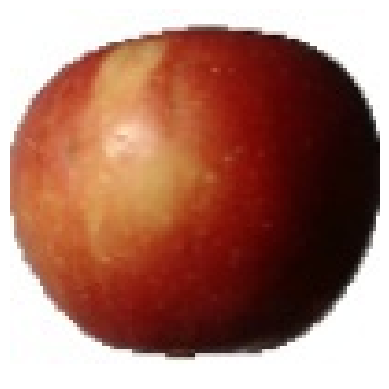

In [3]:
# an example

img = load_img(train_path + "Apple Braeburn 1/0_100.jpg")

plt.imshow(img)
plt.axis('off')
plt.show()

In [4]:
# shape of image

img = img_to_array(img)
img.shape

(100, 100, 3)

In [5]:
# Number of Fruit Class

from glob import glob

className = glob(train_path + '/*')
numberOfClass = len(className)
print("Number of Fruit Class: {}".format(numberOfClass))

Number of Fruit Class: 173


# CNN Model /w Keras

In [6]:
# model

model = Sequential()

model.add(Conv2D(32,(3,3), input_shape = img.shape))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(numberOfClass))
model.add(Activation("softmax"))

model.compile(loss = "categorical_crossentropy", 
              optimizer = "rmsprop",
             metrics = ["accuracy"]) 

batch_size = 32

In [7]:
# Data Augmentation

train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.3,
                                  horizontal_flip = True,
                                  zoom_range = 0.3)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_path,
                                                   target_size = img.shape[:2],
                                                   batch_size = batch_size,
                                                   color_mode = "rgb",
                                                   class_mode = "categorical")

test_generator = test_datagen.flow_from_directory(train_path,
                                                   target_size = img.shape[:2],
                                                   batch_size = batch_size,
                                                   color_mode = "rgb",
                                                   class_mode = "categorical")


Found 88419 images belonging to 173 classes.
Found 88419 images belonging to 173 classes.


In [9]:
# running the model

hist = model.fit(
        train_generator,
        steps_per_epoch=1600 // batch_size,
        epochs=15,
        validation_data=test_generator,
        validation_steps=800 // batch_size)

# model save
model.save_weights("mark.weights.h5")

Epoch 1/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 374ms/step - accuracy: 0.4986 - loss: 1.6598 - val_accuracy: 0.6938 - val_loss: 1.0946
Epoch 2/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 19s 373ms/step - accuracy: 0.5588 - loss: 1.4751 - val_accuracy: 0.7975 - val_loss: 0.6923
Epoch 3/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 18s 359ms/step - accuracy: 0.5981 - loss: 1.3511 - val_accuracy: 0.8125 - val_loss: 0.6872
Epoch 4/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 17s 340ms/step - accuracy: 0.6313 - loss: 1.2024 - val_accuracy: 0.7350 - val_loss: 0.7732
Epoch 5/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 17s 349ms/step - accuracy: 0.6667 - loss: 1.0695 - val_accuracy: 0.8375 - val_loss: 0.5532
Epoch 6/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 17s 333ms/step - accuracy: 0.6713 - loss: 1.0665 - val_accuracy: 0.7250 - val_loss: 0.9569
Epoch 7/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 17s 346ms/step - accuracy: 0.7195 - loss: 0.9131 - val_accuracy: 0.8800 - val_loss: 0.4235
Epoch 8/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 16s 329ms/step - accuracy: 0.7419 - loss: 0.8409 - val_accu

In [13]:
# model save
model.save_weights("mark.weights.h5")

# Model Evaluation

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


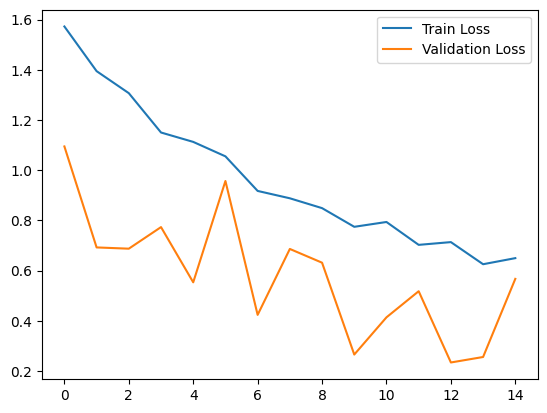

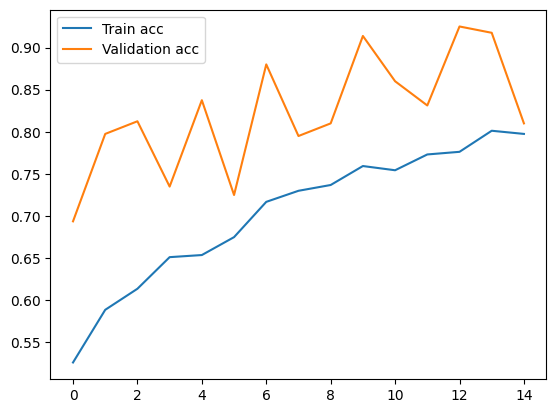

In [14]:
# visualising

print(hist.history.keys())
plt.plot(hist.history["loss"], label = "Train Loss")
plt.plot(hist.history["val_loss"], label = "Validation Loss")
plt.legend()
plt.show()
plt.figure()
plt.plot(hist.history["accuracy"], label="Train acc")
plt.plot(hist.history["val_accuracy"], label="Validation acc")
plt.legend()
plt.show()

In [16]:
# saving history

import json
with open("cnn_fruit_hist.json", "w") as f:
    json.dump(hist.history, f)

In [ ]:
#loading history

import codecs
with codecs.open("cnn_fruit_hist.json","r", encoding = "utf-8") as f:
    h = json.loads(f.read())

plt.plot(h["loss"], label = "Train Loss")
plt.plot(h["val_loss"], label = "Validation Loss")
plt.legend()
plt.show()
plt.figure()
plt.plot(h["accuracy"], label = "Train acc")
plt.plot(h["val_accuracy"],label = "Validation acc")

plt.legend()
plt.show()

# Check results

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Восстанови точную структуру модели, на которой обучал веса
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(100, 100, 3)))  # Здесь жестко задаем форму, совпадающую с исходной
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(numberOfClass))  # убедись, что numberOfClass точно совпадает
model.add(Activation("softmax"))

model.compile(loss="categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

# Теперь загружаем веса
model.load_weights("/kaggle/working/mark.weights.h5")

# Предикт
img_path = '/kaggle/input/fruits/fruits-360_100x100/fruits-360/Training/Apple 8/r0_122_100.jpg'

img = load_img(img_path, target_size=(100, 100))
img_array = img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
predicted_class_label = list(train_generator.class_indices.keys())[predicted_class_index]

print(f'Предсказанный класс: {predicted_class_label}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Предсказанный класс: Apple 10
